In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import numbers
from sklearn import model_selection


In [2]:
# Aquí, a futuro, habría que añadir los datos del Nasdaq, oro y/o Ethereum para ver los resultados
data_for_use = pd.read_csv('./bitcoin_data_for_use_v4.csv', index_col=0)
data_gold = pd.read_csv('./gold_data_for_use.csv', index_col=0)
data_nasdaq = pd.read_csv('./nasdaq_data_for_use.csv', index_col=0)

data_for_use_w_gold = data_for_use.merge(data_gold, left_index=True, right_index=True)
data_for_use_w_nasdaq = data_for_use.merge(data_nasdaq, left_index=True, right_index=True)

data_for_use_w_all = data_for_use_w_gold.merge(data_nasdaq, left_index=True, right_index=True)

data_for_use_basic = data_for_use.drop(labels=['dia',
                    'varV0','varV1','varV2','varV3','varV4','varV5','varV6','varV7','varV8','varV9',
                    'varV10','varV11','varV12','varV13','varV14','varV15','varV16','varV17','varV18','varV19',
                    'varV20','varV21','varV22','varV23','varV24','varV25','varV26','varV27','varV28','varV29', 'outlier'
                    ], axis=1)

data_for_use_bone_deep = data_for_use_basic.drop(labels=['varPm93',
                    'varPm123','varPm153','varPm183','varPm213','varPm243','varPm273','varPm303','varPm333',
                    'varPs30','varPs37','varPs44','varPs51','varPs58','varPs65','varPs72','varPs79','varPs86'
                    ], axis=1)


In [3]:
data_for_use_basic

,varP0,varP1,varP2,varP3,varP4,varP5,varP6,varP7,varP8,varP9,...,varPm123,varPm153,varPm183,varPm213,varPm243,varPm273,varPm303,varPm333,subida,varPSig
2016-01-01,0.008749,0.009252,-0.014696,0.025348,-0.001287,0.013298,-0.084229,0.001468,0.028445,0.013352,...,-0.183043,0.102536,0.131128,-0.060556,-0.054907,-0.068731,0.146342,-0.152457,False,-0.002063
2016-01-02,-0.002063,0.008749,0.009252,-0.014696,0.025348,-0.001287,0.013298,-0.084229,0.001468,0.028445,...,-0.192818,0.102514,0.134863,-0.054992,-0.057860,-0.081400,0.215208,-0.139772,False,-0.007907
2016-01-03,-0.007907,-0.002063,0.008749,0.009252,-0.014696,0.025348,-0.001287,0.013298,-0.084229,0.001468,...,-0.184701,0.077969,0.162987,-0.049962,-0.093926,-0.044459,0.202201,-0.173499,True,0.007163
2016-01-04,0.007163,-0.007907,-0.002063,0.008749,0.009252,-0.014696,0.025348,-0.001287,0.013298,-0.084229,...,-0.203476,0.048931,0.208760,-0.021020,-0.100629,-0.075179,0.272441,-0.241372,False,-0.002611
2016-01-05,-0.002611,0.007163,-0.007907,-0.002063,0.008749,0.009252,-0.014696,0.025348,-0.001287,0.013298,...,-0.182999,0.047772,0.192408,-0.049361,-0.062588,-0.077178,0.234350,-0.244859,False,-0.006609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21,-0.050185,-0.093449,-0.021089,0.021386,-0.010795,-0.008157,0.023015,0.047359,-0.023884,0.019066,...,-0.307969,-0.011426,-0.027993,0.819894,0.296122,0.294667,0.420558,0.264591,True,0.070793
2021-09-22,0.070793,-0.050185,-0.093449,-0.021089,0.021386,-0.010795,-0.008157,0.023015,0.047359,-0.023884,...,-0.274826,-0.054379,-0.048679,0.743330,0.420131,0.265584,0.400979,0.219860,True,0.030306
2021-09-23,0.030306,0.070793,-0.050185,-0.093449,-0.021089,0.021386,-0.010795,-0.008157,0.023015,0.047359,...,-0.319474,-0.031845,-0.026437,0.690406,0.351016,0.242234,0.466289,0.217606,False,-0.045781
2021-09-24,-0.045781,0.030306,0.070793,-0.050185,-0.093449,-0.021089,0.021386,-0.010795,-0.008157,0.023015,...,-0.226667,-0.031976,0.058981,0.512089,0.309128,0.316711,0.432640,0.215800,False,-0.002875


In [4]:
#aqui se marca lo que se va a usar de verdad para el resto del programa
data_for_use = data_for_use_basic

In [5]:
# Partimos los datos en train y test por fechas, sin que sea aleatorio, que es como funcionaría
# en la realidad el modelo
data_no_test, data_test = train_test_split(data_for_use, shuffle=False, test_size=0.2)

# Partimos los datos de train nuevamente en validation y train
data_train, data_valid = train_test_split(data_no_test, shuffle=False, test_size=0.2)

In [6]:
# Separamos la variable que queremos predecir
X_train=data_train.drop(labels=['subida', 'varPSig'], axis=1)
y_train=data_train['subida']
real_train=data_train['varPSig']

X_valid=data_valid.drop(labels=['subida', 'varPSig'], axis=1)
y_valid=data_valid['subida']
real_valid=data_valid['varPSig']

X_test=data_test.drop(labels=['subida', 'varPSig'], axis=1)
y_test=data_test['subida']
real_test=data_test['varPSig']

In [7]:
real_train

2016-01-01   -0.002063
2016-01-02   -0.007907
2016-01-03    0.007163
2016-01-04   -0.002611
2016-01-05   -0.006609
                ...   
2019-08-28   -0.025037
2019-08-29    0.009250
2019-08-30    0.003385
2019-08-31    0.013219
2019-09-01    0.060339
Name: varPSig, Length: 1340, dtype: float64

In [8]:
real_valid

2019-09-02    0.026750
2019-09-03   -0.002734
2019-09-04   -0.001790
2019-09-05   -0.021014
2019-09-06    0.015836
                ...   
2020-07-29    0.000968
2020-07-30    0.019103
2020-07-31    0.038515
2020-08-01   -0.060034
2020-08-02    0.017436
Name: varPSig, Length: 336, dtype: float64

In [9]:
real_test

2020-08-03   -0.003597
2020-08-04    0.048290
2020-08-05    0.002788
2020-08-06   -0.015136
2020-08-07    0.013151
                ...   
2021-09-21    0.070793
2021-09-22    0.030306
2021-09-23   -0.045781
2021-09-24   -0.002875
2021-09-25    0.011516
Name: varPSig, Length: 419, dtype: float64

In [10]:
# Miramos cuántos días sube el bitcoin sobre el total en cada uno de los segmentos
# esto nos servirá para hacernos una idea de cómo de buenos son los resultados de los modelos
y_train.sum()/y_train.size

0.5686567164179105

In [11]:
y_valid.sum()/y_valid.size

0.4851190476190476

In [12]:
y_test.sum()/y_test.size

0.5513126491646778

In [13]:
#Tenemos que hacer one-hot encoding sobre la columna "dia"
#Sobre el resto aplicamos el standardscaler

number_columns = X_train.select_dtypes('number').columns

t=[
    #('dia', 
    #OneHotEncoder(handle_unknown='ignore'),
    #['dia']),
    ('scaler', StandardScaler(),number_columns)
    ]

ct = ColumnTransformer(transformers=t, remainder='passthrough')

#data_for_use_t=ct.fit_transform(data_for_use)

#X_train=ct.fit_transform(X_train)
#X_valid=ct.transform(X_valid)
#X_test=ct.transform(X_test)

In [71]:
def walk_forward_validation (model, X_train_wfv, y_train_wfv, X_test_wfv, y_test_wfv, real_test_wfv):
    y_pred_wfv = list()
    #variable que indica si, siguiendo el modelo, estaríamos invertidos o no
    dentro=True
    resultado_naive=1
    resultado_mod=1
    resultado_mod_comis=1
    
    listadoDecisores=[]
    
    for i in range(len(y_test_wfv)):
        X_train_wfv_ct=ct.fit_transform(X_train_wfv)
        model.fit(X_train_wfv_ct, y_train_wfv)
        X_test_wfv_ct=ct.transform(X_test_wfv)
        y_pred_next = model.predict(X_test_wfv_ct[i:i+1])
        y_pred_wfv.append(y_pred_next[0])
        X_train_wfv=X_train_wfv.append(X_test_wfv[i:i+1])
        y_train_wfv=y_train_wfv.append(pd.Series(y_test_wfv[i]))
        
        listadoDecisores.append([tree.plot_tree(model)[0], y_test_wfv[i], y_pred_next[0]])
        
        #suponemos una comisión por compra/venta del 0,15%
        if y_pred_next[0]!=dentro:
            resultado_mod_comis=resultado_mod_comis*(1-0.0015)
        dentro=y_pred_next[0]
        
        #el naive seimpre se mantiene comprado (o siempre supone que sube)
        resultado_naive=resultado_naive*(1+real_test_wfv[i])
        #si estamos comprados entonces se nos aplica la subida o bajada del día siguiente
        if dentro:
            resultado_mod=resultado_mod*(1+real_test_wfv[i])
            resultado_mod_comis=resultado_mod_comis*(1+real_test_wfv[i])
    
    return metrics.confusion_matrix(y_test_wfv, y_pred_wfv), metrics.f1_score(y_test_wfv,y_pred_wfv), \
        metrics.accuracy_score(y_test_wfv,y_pred_wfv), resultado_naive, resultado_mod, resultado_mod_comis, \
        listadoDecisores
        
        

In [87]:
lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=0)

X_train_c=X_train.copy()
y_train_c=y_train.copy()
X_valid_c=X_valid.copy()
y_valid_c=y_valid.copy()


conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis = \
    walk_forward_validation(lr, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)

In [88]:
print(conf_mat, f1sc, accsc)
print(resultado_naive, resultado_mod, resultado_mod_comis)

[[ 31 142]
 [ 29 134]] 0.6104783599088838 0.49107142857142855
1.0869439154370777 0.7815546528988364 0.6889650101117196


In [91]:
for vecinos in range(1,31):
    kn = KNeighborsClassifier(n_neighbors=vecinos)
    
    X_train_c=X_train.copy()
    y_train_c=y_train.copy()
    X_valid_c=X_valid.copy()
    y_valid_c=y_valid.copy()


    conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis = \
        walk_forward_validation(kn, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)
    print ("Numero de vecinos aplicado: " + str(vecinos))
    print(conf_mat, f1sc, accsc)
    print(resultado_naive, resultado_mod, resultado_mod_comis)

Numero de vecinos aplicado: 1
[[ 69 104]
 [ 60 103]] 0.5567567567567567 0.5119047619047619
1.0869439154370777 1.7979590351156092 1.4247232760742718
Numero de vecinos aplicado: 2
[[105  68]
 [ 99  64]] 0.4338983050847458 0.5029761904761905
1.0869439154370777 0.9897242754924797 0.7819177788720538
Numero de vecinos aplicado: 3
[[ 56 117]
 [ 53 110]] 0.5641025641025641 0.49404761904761907
1.0869439154370777 1.2469811739041308 0.9925820481082959
Numero de vecinos aplicado: 4
[[87 86]
 [76 87]] 0.517857142857143 0.5178571428571429
1.0869439154370777 1.417949758675036 1.0920056490084769
Numero de vecinos aplicado: 5
[[ 45 128]
 [ 38 125]] 0.6009615384615384 0.5059523809523809
1.0869439154370777 0.8733933633009724 0.7207136474747645
Numero de vecinos aplicado: 6
[[ 69 104]
 [ 63 100]] 0.544959128065395 0.5029761904761905
1.0869439154370777 1.4443239378431028 1.1393562626729876
Numero de vecinos aplicado: 7
[[ 34 139]
 [ 33 130]] 0.601851851851852 0.4880952380952381
1.0869439154370777 1.1974185

In [92]:
for grado in range(1,4):
    sv = SVC(probability=True, kernel='poly', degree=grado, random_state=0)
    
    X_train_c=X_train.copy()
    y_train_c=y_train.copy()
    X_valid_c=X_valid.copy()
    y_valid_c=y_valid.copy()


    conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis = \
        walk_forward_validation(sv, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)
    print ("Grado aplicado: " + str(grado))
    print(conf_mat, f1sc, accsc)
    print(resultado_naive, resultado_mod, resultado_mod_comis)

Grado aplicado: 30
[[  0 173]
 [  0 163]] 0.6533066132264529 0.4851190476190476
1.0869439154370777 1.0869439154370777 1.0869439154370777
Grado aplicado: 30
[[ 21 152]
 [ 26 137]] 0.6061946902654868 0.47023809523809523
1.0869439154370777 0.7823907151503426 0.7150029609934657
Grado aplicado: 30
[[  6 167]
 [ 10 153]] 0.6335403726708075 0.4732142857142857
1.0869439154370777 0.8844211861204657 0.8582632593725852


In [105]:
for profund in range(1,31):
    dt = DecisionTreeClassifier(max_depth=profund, random_state=0)
    
    X_train_c=X_train.copy()
    y_train_c=y_train.copy()
    X_valid_c=X_valid.copy()
    y_valid_c=y_valid.copy()


    conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis = \
        walk_forward_validation(dt, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)
    print ("Profundidad máxima aplicada: " + str(profund))
    print(conf_mat, f1sc, accsc)
    print(resultado_naive, resultado_mod, resultado_mod_comis)

Profundidad máxima aplicada: 1
[[ 15 158]
 [ 10 153]] 0.6455696202531646 0.5
1.0869439154370777 1.125642659116352 1.1088715358581112
Profundidad máxima aplicada: 2
[[ 23 150]
 [ 22 141]] 0.6211453744493393 0.4880952380952381
1.0869439154370777 1.082021977037323 1.0143855586808417
Profundidad máxima aplicada: 3
[[ 34 139]
 [ 29 134]] 0.6146788990825689 0.5
1.0869439154370777 1.2384487213368045 1.130082762894619
Profundidad máxima aplicada: 4
[[ 32 141]
 [ 30 133]] 0.608695652173913 0.49107142857142855
1.0869439154370777 1.040316074018028 0.9351434203946751
Profundidad máxima aplicada: 5
[[ 34 139]
 [ 32 131]] 0.605080831408776 0.49107142857142855
1.0869439154370777 1.001937288649288 0.8753198322516444
Profundidad máxima aplicada: 6
[[ 39 134]
 [ 30 133]] 0.6186046511627907 0.5119047619047619
1.0869439154370777 1.0738353313519051 0.9437818928033127
Profundidad máxima aplicada: 7
[[ 49 124]
 [ 40 123]] 0.5999999999999999 0.5119047619047619
1.0869439154370777 1.1452361882541704 0.957889247

In [106]:
for estimadores in range(1,21):
    adab = AdaBoostClassifier(n_estimators=estimadores, random_state=0)
    
    X_train_c=X_train.copy()
    y_train_c=y_train.copy()
    X_valid_c=X_valid.copy()
    y_valid_c=y_valid.copy()


    conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis = \
        walk_forward_validation(adab, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)
    print ("Numero de estimadores aplicado: " + str(estimadores))
    print(conf_mat, f1sc, accsc)
    print(resultado_naive, resultado_mod, resultado_mod_comis)

Numero de estimadores aplicado: 1
[[ 15 158]
 [ 10 153]] 0.6455696202531646 0.5
1.0869439154370777 1.125642659116352 1.1088715358581112
Numero de estimadores aplicado: 2
[[ 31 142]
 [ 23 140]] 0.6292134831460674 0.5089285714285714
1.0869439154370777 1.0730785593699963 1.0227505745787446
Numero de estimadores aplicado: 3
[[ 41 132]
 [ 40 123]] 0.5885167464114833 0.4880952380952381
1.0869439154370777 0.8544515137084288 0.7843815473096084
Numero de estimadores aplicado: 4
[[ 27 146]
 [ 18 145]] 0.6387665198237885 0.5119047619047619
1.0869439154370777 1.4871857181446344 1.4302600414564428
Numero de estimadores aplicado: 5
[[ 36 137]
 [ 25 138]] 0.6301369863013698 0.5178571428571429
1.0869439154370777 1.540147126928755 1.4417078233160587
Numero de estimadores aplicado: 6
[[ 40 133]
 [ 32 131]] 0.613583138173302 0.5089285714285714
1.0869439154370777 1.4908836097990215 1.3747998543884816
Numero de estimadores aplicado: 7
[[ 38 135]
 [ 36 127]] 0.5976470588235294 0.49107142857142855
1.08694391

In [13]:
dt = DecisionTreeClassifier(max_depth=11)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)

X_train_c=ct.fit_transform(X_train_c)
dt.fit(X_train_c,y_train_c)
y_predict=dt.predict(X_train_c)

(metrics.confusion_matrix(y_train_c, y_predict), metrics.f1_score(y_train_c,y_predict), metrics.accuracy_score(y_train_c,y_predict))

(array([[573, 178],
        [122, 803]], dtype=int64),
 0.8426023084994754,
 0.8210023866348448)

In [15]:
dt = DecisionTreeClassifier(max_depth=29)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)

X_train_c=ct.fit_transform(X_train_c)
dt.fit(X_train_c,y_train_c)
y_predict=dt.predict(X_train_c)

(metrics.confusion_matrix(y_train_c, y_predict), metrics.f1_score(y_train_c,y_predict), metrics.accuracy_score(y_train_c,y_predict))

(array([[751,   0],
        [  0, 925]], dtype=int64),
 1.0,
 1.0)

In [66]:
adab = AdaBoostClassifier(n_estimators=19)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)

X_train_c=ct.fit_transform(X_train_c)
adab.fit(X_train_c,y_train_c)
y_predict=adab.predict(X_train_c)

(metrics.confusion_matrix(y_train_c, y_predict), metrics.f1_score(y_train_c,y_predict), metrics.accuracy_score(y_train_c,y_predict))

(array([[319, 432],
        [184, 741]]),
 0.7063870352716872,
 0.6324582338902148)

In [67]:
kn = KNeighborsClassifier(n_neighbors=3)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)

X_train_c=ct.fit_transform(X_train_c)
kn.fit(X_train_c,y_train_c)
y_predict=kn.predict(X_train_c)

(metrics.confusion_matrix(y_train_c, y_predict), metrics.f1_score(y_train_c,y_predict), metrics.accuracy_score(y_train_c,y_predict))

(array([[475, 276],
        [141, 784]]),
 0.7899244332493702,
 0.7511933174224343)

In [47]:
kn = KNeighborsClassifier(n_neighbors=15)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)

X_train_c=ct.fit_transform(X_train_c)
kn.fit(X_train_c,y_train_c)
y_predict=kn.predict(X_train_c)

(metrics.confusion_matrix(y_train_c, y_predict), metrics.f1_score(y_train_c,y_predict), metrics.accuracy_score(y_train_c,y_predict))

(array([[239, 512],
        [134, 791]]),
 0.7100538599640933,
 0.6145584725536993)

[[ 11 177]
 [  5 226]] 0.7129337539432176 0.5656324582338902
3.8420060121748145 5.129345416495867 5.098638520939822


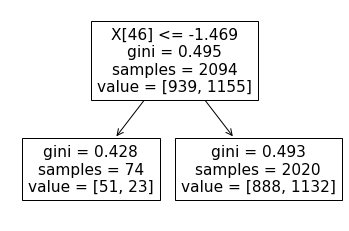

In [72]:
#Este es el código para ver cómo funciona el modelo de verdad (este es el resultado del basic)

dt_final = DecisionTreeClassifier(max_depth=1)

X_train_c=X_train.append(X_valid)
y_train_c=y_train.append(y_valid)
X_test_c=X_test.copy()
y_test_c=y_test.copy()

conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis, listadoDecisores = \
        walk_forward_validation(dt_final, X_train_c, y_train_c, X_test_c, y_test_c, real_test)
print(conf_mat, f1sc, accsc)
print(resultado_naive, resultado_mod, resultado_mod_comis)


In [73]:
listadoDecisores

[[Text(167.4, 163.07999999999998, 'X[46] <= -1.432\ngini = 0.495\nsamples = 1676\nvalue = [751, 925]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.431\ngini = 0.495\nsamples = 1677\nvalue = [752, 925]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.43\ngini = 0.495\nsamples = 1678\nvalue = [752, 926]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.429\ngini = 0.495\nsamples = 1679\nvalue = [752, 927]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.428\ngini = 0.495\nsamples = 1680\nvalue = [753, 927]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.428\ngini = 0.495\nsamples = 1681\nvalue = [753, 928]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.427\ngini = 0.495\nsamples = 1682\nvalue = [754, 928]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[46] <= -1.427\ngini = 0.495\nsamples = 1683\nvalue = [754, 929]'),
  False,
  True],
 [Text(167.4, 163.07999999999

In [76]:
y_test_c

2020-08-03    False
2020-08-04     True
2020-08-05     True
2020-08-06    False
2020-08-07     True
              ...  
2021-09-21     True
2021-09-22     True
2021-09-23    False
2021-09-24    False
2021-09-25     True
Name: subida, Length: 419, dtype: bool

[[ 15 158]
 [ 10 153]] 0.6455696202531646 0.5
1.086943915437065 1.125642659116341 1.1088715358581016


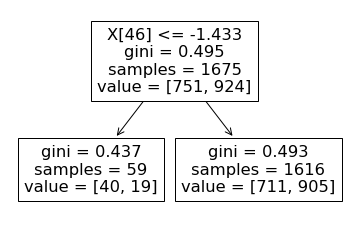

In [74]:
dt_final = DecisionTreeClassifier(max_depth=1)

X_train_c=X_train.copy()
y_train_c=y_train.copy()
X_valid_c=X_valid.copy()
y_valid_c=y_valid.copy()


conf_mat, f1sc, accsc, resultado_naive, resultado_mod, resultado_mod_comis, listadoDecisores = \
    walk_forward_validation(dt_final, X_train_c, y_train_c, X_valid_c, y_valid_c, real_valid)
print(conf_mat, f1sc, accsc)
print(resultado_naive, resultado_mod, resultado_mod_comis)

In [75]:
listadoDecisores

[[Text(167.4, 163.07999999999998, 'X[27] <= 0.55\ngini = 0.491\nsamples = 1340\nvalue = [578, 762]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.551\ngini = 0.49\nsamples = 1341\nvalue = [578, 763]'),
  False,
  False],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.55\ngini = 0.491\nsamples = 1342\nvalue = [579, 763]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.551\ngini = 0.491\nsamples = 1343\nvalue = [580, 763]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.551\ngini = 0.491\nsamples = 1344\nvalue = [581, 763]'),
  True,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.552\ngini = 0.491\nsamples = 1345\nvalue = [581, 764]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.107\ngini = 0.491\nsamples = 1346\nvalue = [582, 764]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X[27] <= 0.552\ngini = 0.491\nsamples = 1347\nvalue = [583, 764]'),
  False,
  True],
 [Text(167.4, 163.07999999999998, 'X